In [3]:
# SETUP

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

!git clone https://github.com/4L4N4F/python-ML.git
df = pd.read_parquet('python-ML/data/df_limpo.parquet')


fatal: destination path 'python-ML' already exists and is not an empty directory.
Index(['age', 'attrition', 'businesstravel', 'department', 'distancefromhome',
       'education', 'educationfield', 'employeeid', 'gender', 'joblevel',
       'jobrole', 'maritalstatus', 'monthlyincome', 'numcompaniesworked',
       'percentsalaryhike', 'stockoptionlevel', 'totalworkingyears',
       'trainingtimeslastyear', 'yearsatcompany', 'yearssincelastpromotion',
       'yearswithcurrmanager', 'monthlyincome_log', 'levelbyeducation',
       'timewithoutpromotion', 'age_group', 'distance_category',
       'timewithoutpromotion_rel'],
      dtype='object')


In [4]:
print(df.columns)

Index(['age', 'attrition', 'businesstravel', 'department', 'distancefromhome',
       'education', 'educationfield', 'employeeid', 'gender', 'joblevel',
       'jobrole', 'maritalstatus', 'monthlyincome', 'numcompaniesworked',
       'percentsalaryhike', 'stockoptionlevel', 'totalworkingyears',
       'trainingtimeslastyear', 'yearsatcompany', 'yearssincelastpromotion',
       'yearswithcurrmanager', 'monthlyincome_log', 'levelbyeducation',
       'timewithoutpromotion', 'age_group', 'distance_category',
       'timewithoutpromotion_rel'],
      dtype='object')


In [7]:
# descritiva das numéricas contínuas

cont_vars = ['age', 'monthlyincome', 'numcompaniesworked', 'totalworkingyears',
             'yearsatcompany', 'yearssincelastpromotion', 'yearswithcurrmanager',
             'monthlyincome_log', 'levelbyeducation', 'timewithoutpromotion_rel']

print(df[cont_vars].describe())

               age  monthlyincome  numcompaniesworked  totalworkingyears  \
count  4410.000000    4410.000000         4410.000000        4410.000000   
mean     36.923810   65029.312925            2.691837          11.277324   
std       9.133301   47068.888559            2.493912           7.774490   
min      18.000000   10090.000000            0.000000           0.000000   
25%      30.000000   29110.000000            1.000000           6.000000   
50%      36.000000   49190.000000            2.000000          10.000000   
75%      43.000000   83800.000000            4.000000          15.000000   
max      60.000000  199990.000000            9.000000          40.000000   

       yearsatcompany  yearssincelastpromotion  yearswithcurrmanager  \
count     4410.000000              4410.000000           4410.000000   
mean         7.008163                 2.187755              4.123129   
std          6.125135                 3.221699              3.567327   
min          0.000000      

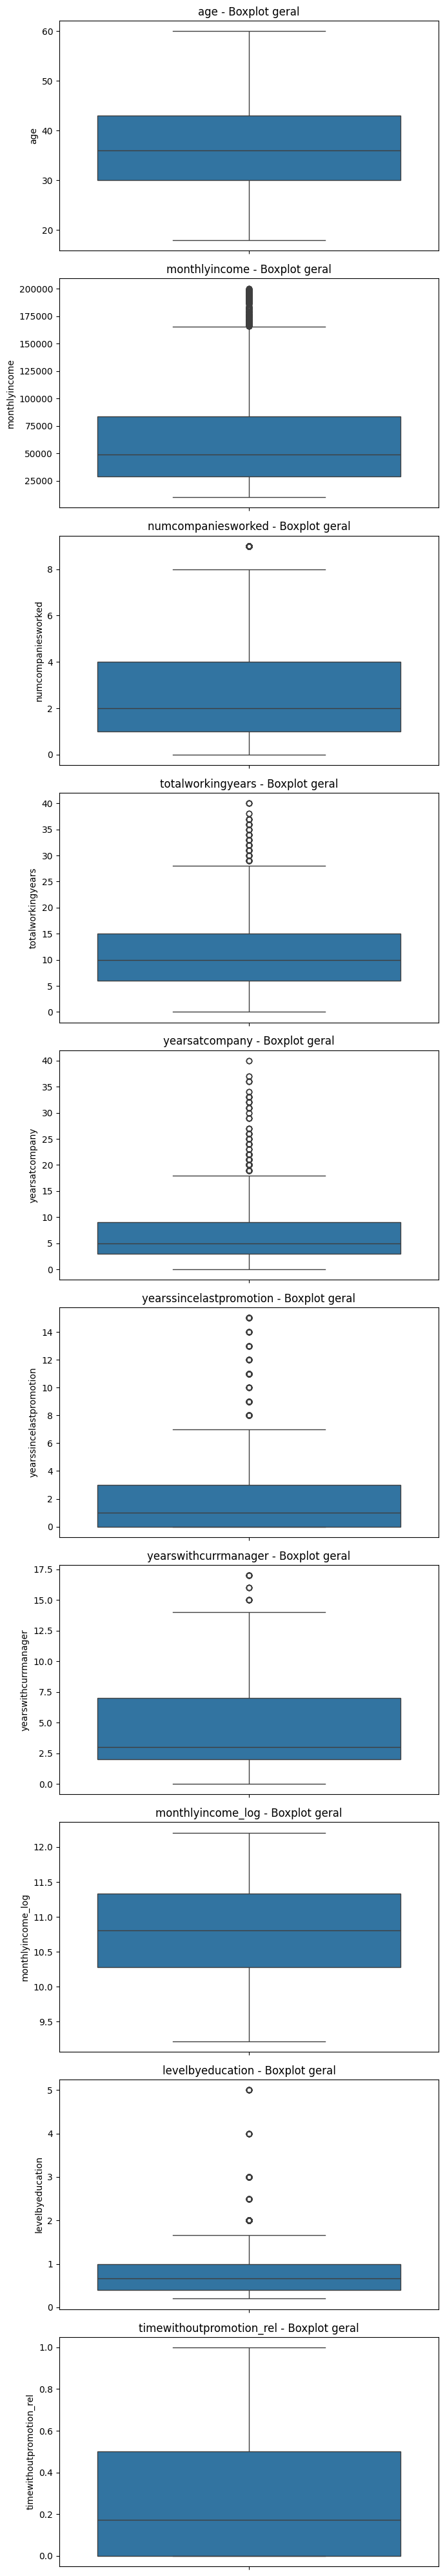

In [10]:
plt.figure(figsize=(7, len(cont_vars)*4))

for i, var in enumerate(cont_vars):
    plt.subplot(len(cont_vars), 1, i+1)
    sns.boxplot(y=var, data=df)  # Só a variável, sem separação por attrition
    plt.title(f'{var} - Boxplot geral')
    plt.tight_layout()

plt.show()

# modelo de árvores e emsemble tendem a lidar melhor com outliers, porque os desse dataset são plausíveis

In [5]:
# distribuição da variável alvo (considerar desbalanceamento pra construção do modelo)

print(df['attrition'].value_counts())
print(df['attrition'].value_counts(normalize=True))

attrition
No     3699
Yes     711
Name: count, dtype: int64
attrition
No     0.838776
Yes    0.161224
Name: proportion, dtype: float64


<Axes: >

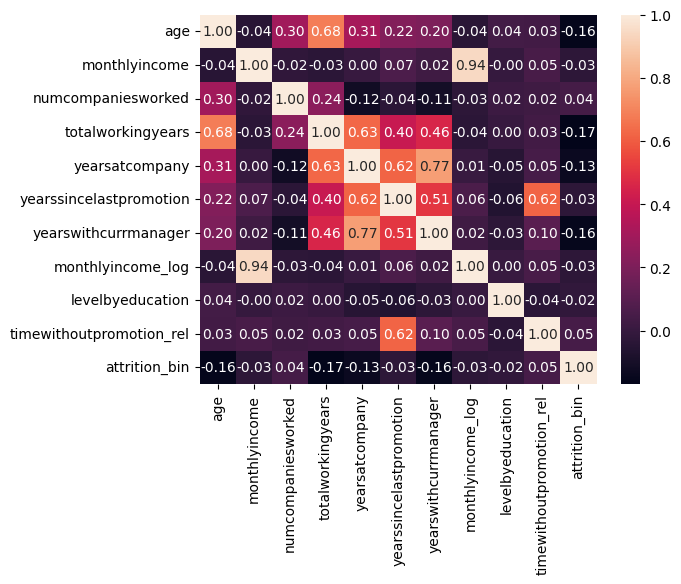

In [12]:
# correlação entre variáveis contínas e alvo (numéricas discretas nem sempre funcionam bem com pearson, só se tiver mais valores)

# passa a variável pra binária
df['attrition_bin'] = df['attrition'].map({'No': 0, 'Yes': 1})

cont_vars = ['age', 'monthlyincome', 'numcompaniesworked', 'totalworkingyears',
             'yearsatcompany', 'yearssincelastpromotion', 'yearswithcurrmanager',
             'monthlyincome_log', 'levelbyeducation', 'timewithoutpromotion_rel']

corr = df[cont_vars + ['attrition_bin']].corr()
sns.heatmap(corr, annot=True, fmt=".2f")


A correlação linear entre as variáveis contínuas e attrition_bin é baixa (-0,16 a 0,05). Nenhuma variável contínua sozinha tem forte relação linear com a saída do funcionário.

/tmp/ipython-input-109532680.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='attrition', y=var, data=df, palette='Set2')
/tmp/ipython-input-109532680.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='attrition', y=var, data=df, palette='Set2')
/tmp/ipython-input-109532680.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='attrition', y=var, data=df, palette='Set2')
/tmp/ipython-input-109532680.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable

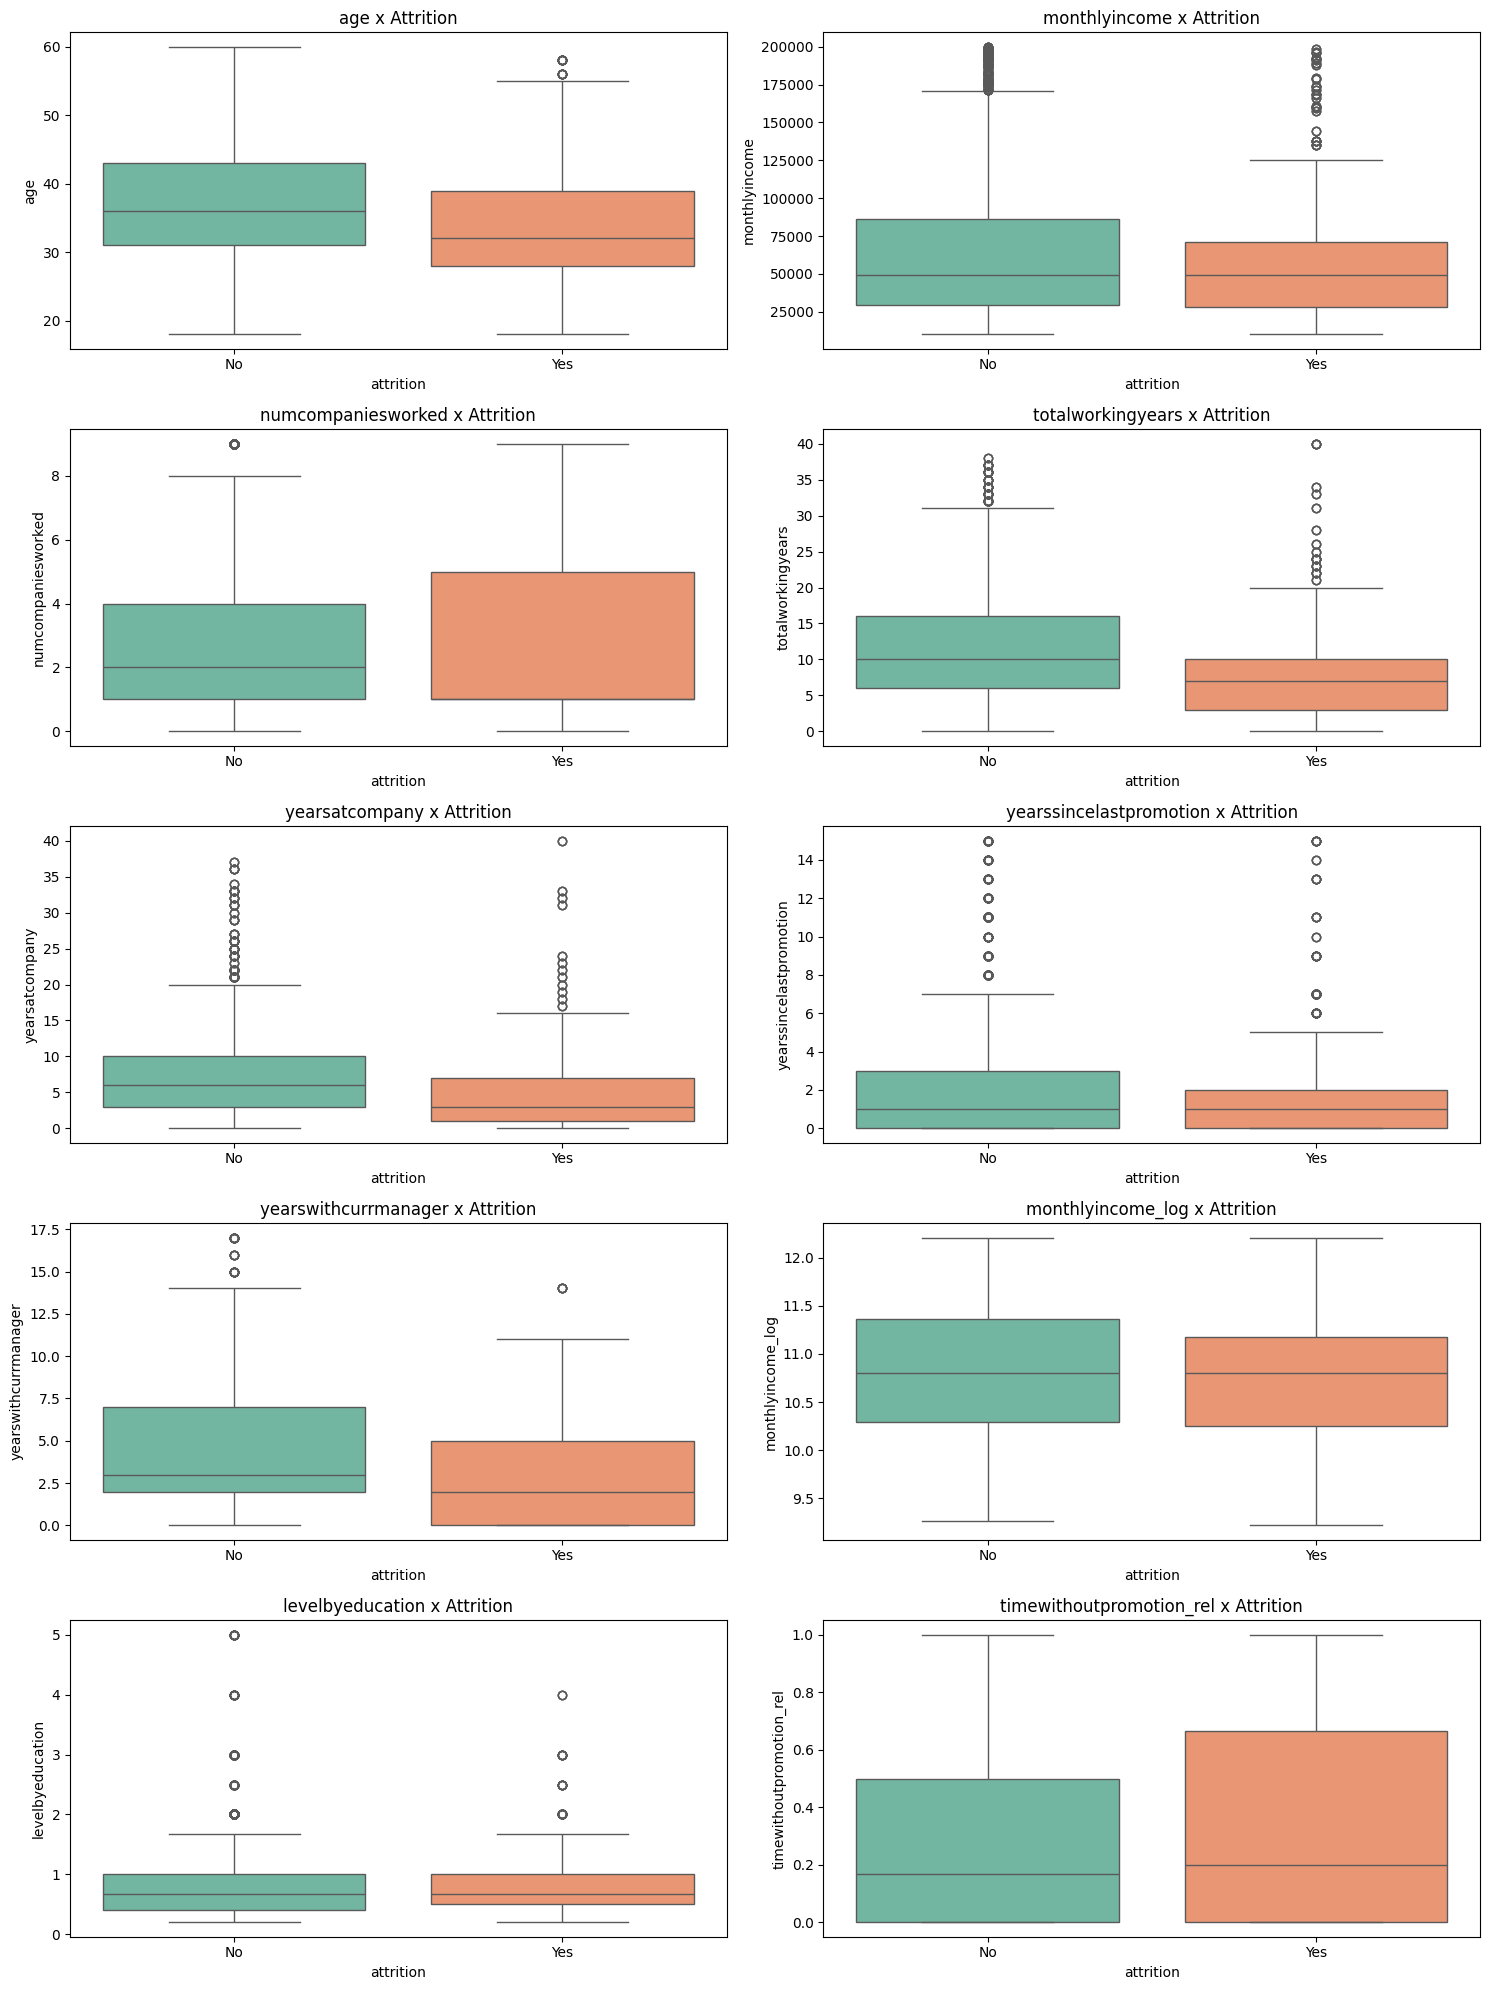

In [24]:
# boxplot por target

plt.figure(figsize=(15, 20))
for i, var in enumerate(cont_vars, 1):
    plt.subplot(5, 2, i)
    sns.boxplot(x='attrition', y=var, data=df, palette='Set2')
    plt.title(f'{var} x Attrition')
plt.tight_layout()
plt.show()

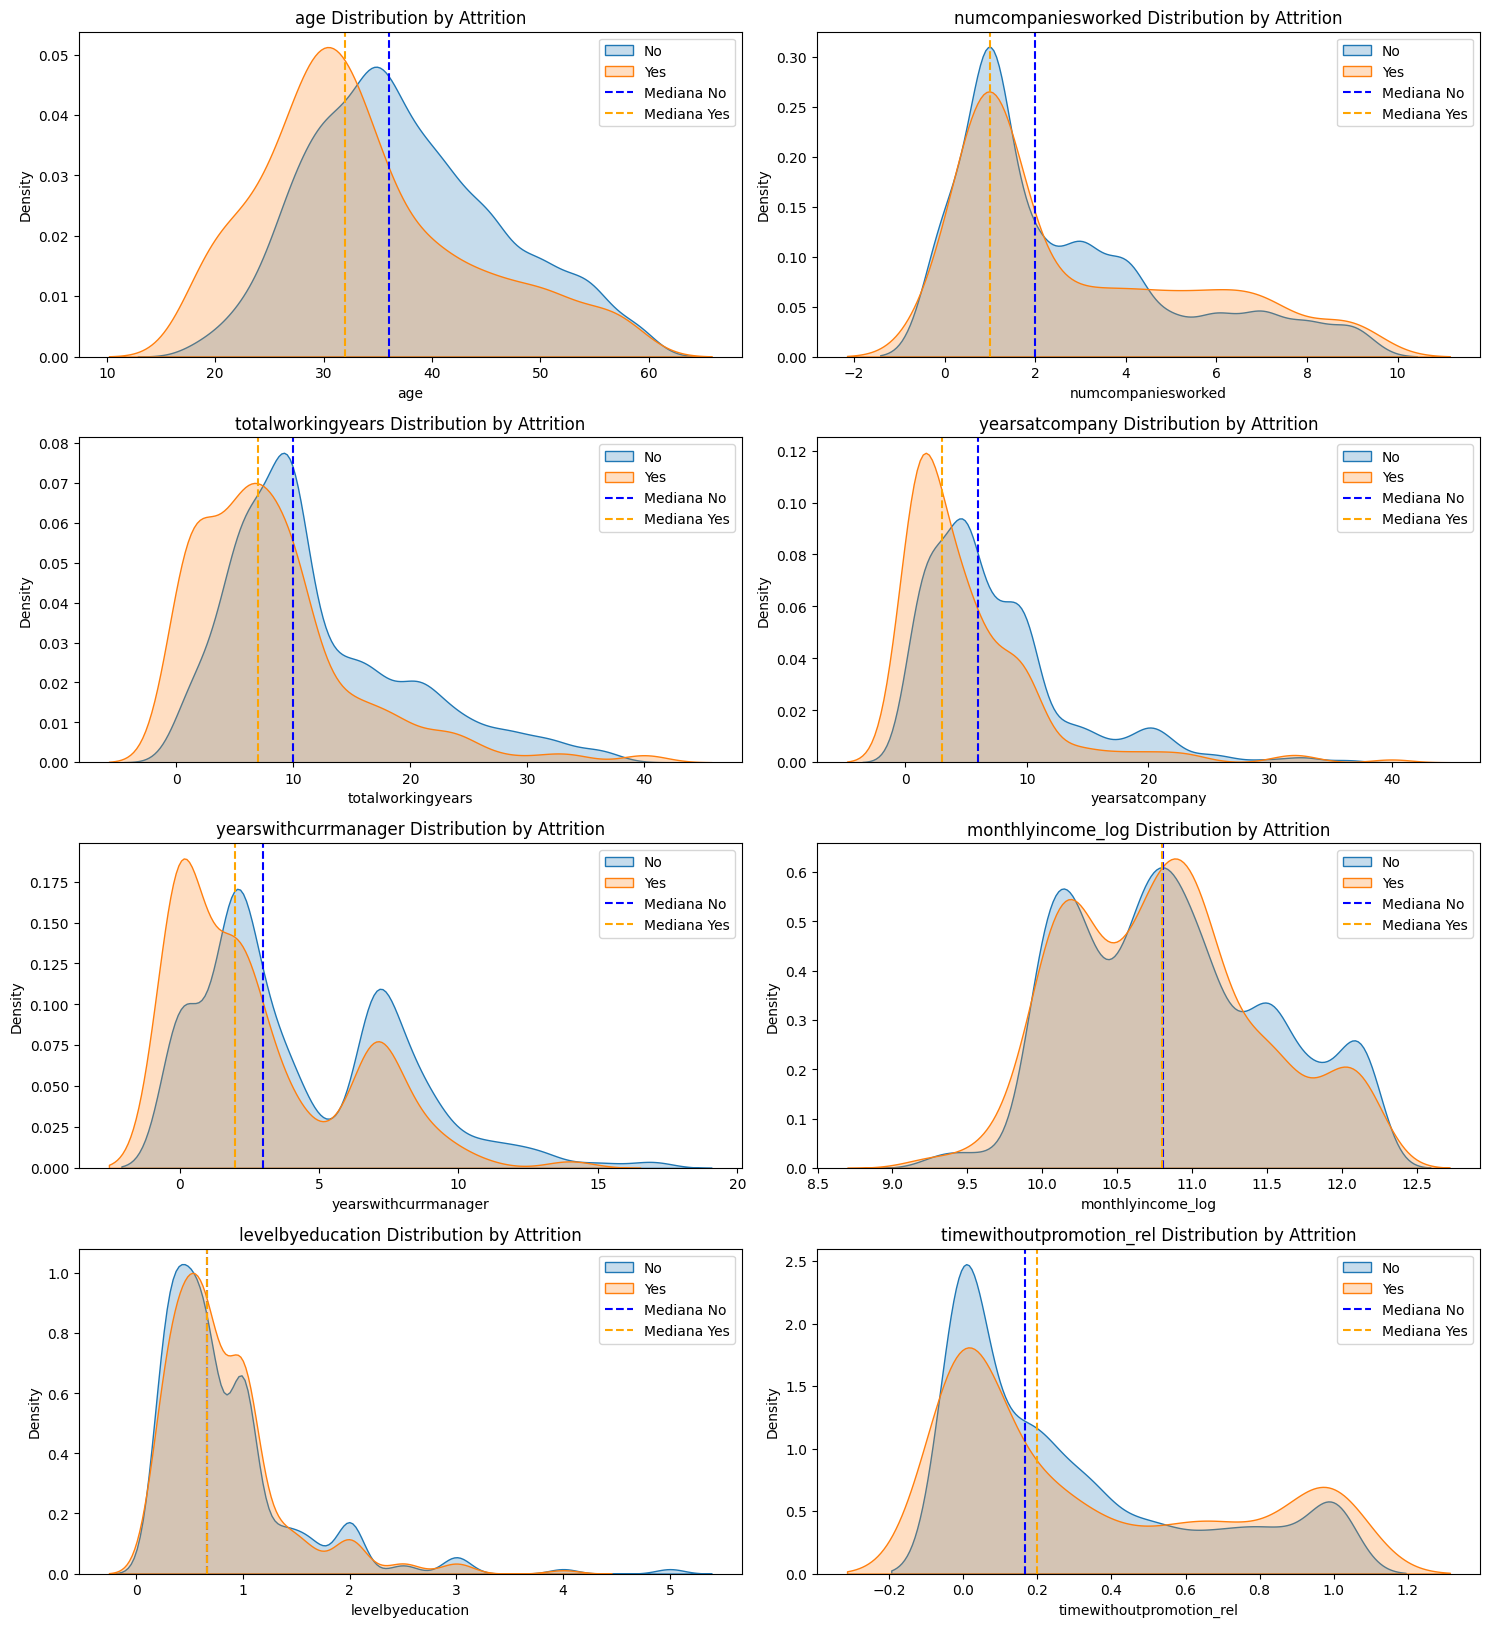

In [28]:
# KDE por target

cont_vars2 = ['age', 'numcompaniesworked', 'totalworkingyears',
             'yearsatcompany', 'yearswithcurrmanager',
             'monthlyincome_log', 'levelbyeducation', 'timewithoutpromotion_rel']

plt.figure(figsize=(15, 20))
for i, var in enumerate(cont_vars2, 1):
    plt.subplot(5, 2, i)
    sns.kdeplot(df.loc[df['attrition']=='No', var], label='No', fill=True)
    sns.kdeplot(df.loc[df['attrition']=='Yes', var], label='Yes', fill=True)

    med_no = df.loc[df['attrition']=='No', var].median()
    med_yes = df.loc[df['attrition']=='Yes', var].median()
    plt.axvline(med_no, color='blue', linestyle='--', label='Mediana No')
    plt.axvline(med_yes, color='orange', linestyle='--', label='Mediana Yes')

    plt.title(f'{var} Distribution by Attrition')
    plt.legend()
plt.tight_layout()
plt.show()


SyntaxError: invalid syntax (ipython-input-3274704471.py, line 1)

age+ totalworkingyears+ numcompaniesworked + yearsatcompany são todas variáveis que mostram uma relação forte de turnover entre mais jovens e menos experientes de modo np.greater_equal
falta de crescimento na carreira está associada ao turnover
a relação mais longa com a chefia também parece que ajuda


--- businesstravel ---
                   count  attrition_rate
businesstravel                          
Travel_Frequently    831        0.249097
Travel_Rarely       3129        0.149569
Non-Travel           450        0.080000


/tmp/ipython-input-2005142022.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=summary.index, y=summary['attrition_rate'], palette='viridis')


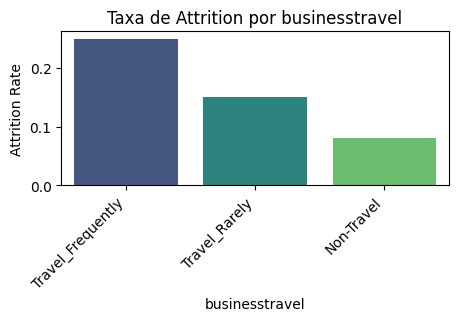


--- department ---
                        count  attrition_rate
department                                   
Human Resources           189        0.301587
Research & Development   2883        0.157128
Sales                    1338        0.150224


/tmp/ipython-input-2005142022.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=summary.index, y=summary['attrition_rate'], palette='viridis')


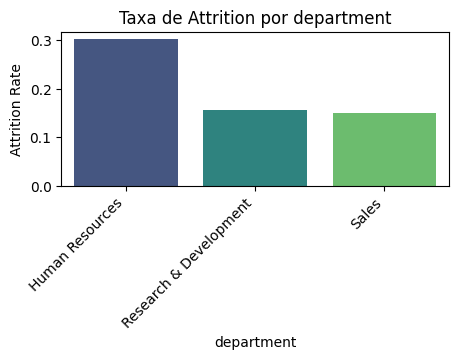


--- education ---
           count  attrition_rate
education                       
2            846        0.187943
4           1194        0.155779
3           1716        0.155594
1            510        0.152941
5            144        0.145833


/tmp/ipython-input-2005142022.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=summary.index, y=summary['attrition_rate'], palette='viridis')


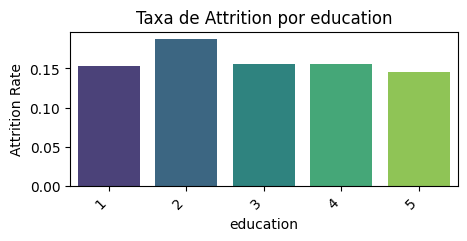


--- educationfield ---
                  count  attrition_rate
educationfield                         
Human Resources      81        0.407407
Life Sciences      1818        0.166667
Medical            1392        0.161638
Marketing           477        0.157233
Other               246        0.121951
Technical Degree    396        0.113636


/tmp/ipython-input-2005142022.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=summary.index, y=summary['attrition_rate'], palette='viridis')


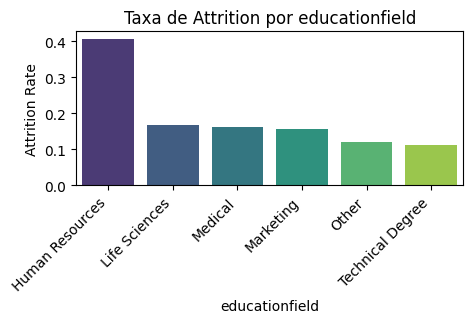


--- gender ---
        count  attrition_rate
gender                       
Male     2646        0.166667
Female   1764        0.153061


/tmp/ipython-input-2005142022.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=summary.index, y=summary['attrition_rate'], palette='viridis')


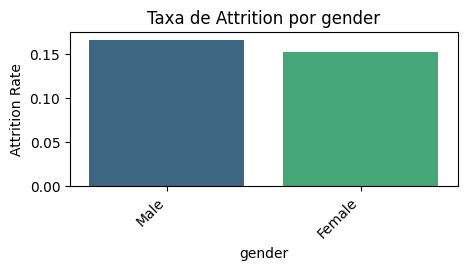


--- joblevel ---
          count  attrition_rate
joblevel                       
2          1602        0.177903
4           318        0.160377
1          1629        0.154696
3           654        0.146789
5           207        0.130435


/tmp/ipython-input-2005142022.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=summary.index, y=summary['attrition_rate'], palette='viridis')


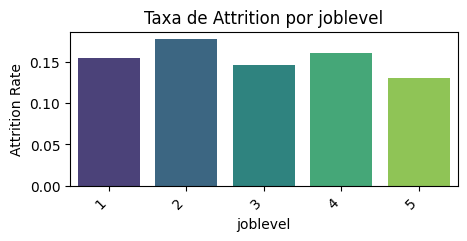

/tmp/ipython-input-2005142022.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=summary.index, y=summary['attrition_rate'], palette='viridis')



--- jobrole ---
                           count  attrition_rate
jobrole                                         
Research Director            240        0.237500
Research Scientist           876        0.181507
Sales Executive              978        0.168712
Laboratory Technician        777        0.162162
Healthcare Representative    393        0.145038
Sales Representative         249        0.144578
Manager                      306        0.137255
Human Resources              156        0.134615
Manufacturing Director       435        0.110345


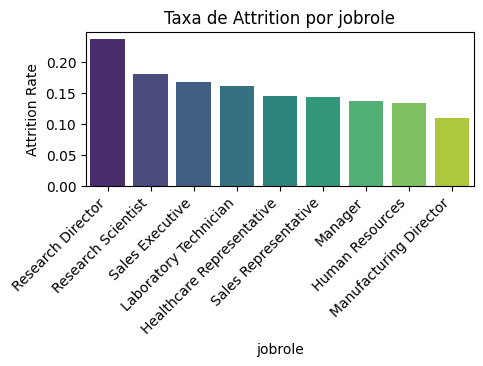


--- maritalstatus ---
               count  attrition_rate
maritalstatus                       
Single          1410        0.255319
Married         2019        0.124814
Divorced         981        0.100917


/tmp/ipython-input-2005142022.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=summary.index, y=summary['attrition_rate'], palette='viridis')


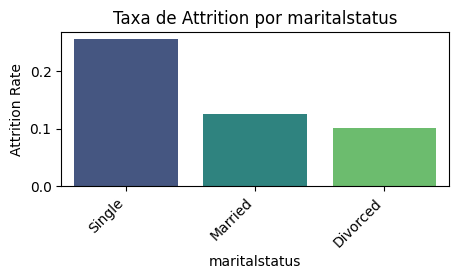


--- stockoptionlevel ---
                  count  attrition_rate
stockoptionlevel                       
2                   474        0.177215
0                  1893        0.167987
3                   255        0.152941
1                  1788        0.151007


/tmp/ipython-input-2005142022.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=summary.index, y=summary['attrition_rate'], palette='viridis')


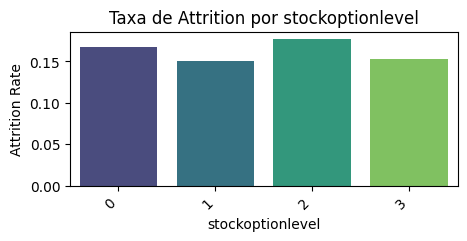

/tmp/ipython-input-2005142022.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = df.groupby(var)['attrition_bin'].agg(['count', 'mean']).sort_values('mean', ascending=False)
/tmp/ipython-input-2005142022.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=summary.index, y=summary['attrition_rate'], palette='viridis')



--- age_group ---
           count  attrition_rate
age_group                       
18-25        369        0.357724
26-35       1818        0.191419
56+          141        0.170213
46-55        678        0.115044
36-45       1404        0.091880


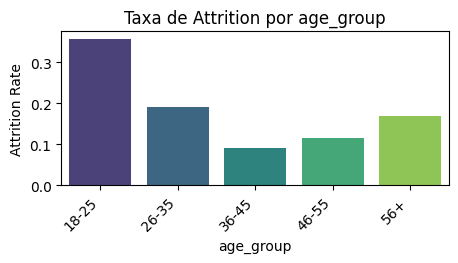


--- distance_category ---
                   count  attrition_rate
distance_category                       
perto               1527        0.170923
muito_perto         1896        0.159810
medio                726        0.152893
longe                261        0.137931


/tmp/ipython-input-2005142022.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = df.groupby(var)['attrition_bin'].agg(['count', 'mean']).sort_values('mean', ascending=False)
/tmp/ipython-input-2005142022.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=summary.index, y=summary['attrition_rate'], palette='viridis')


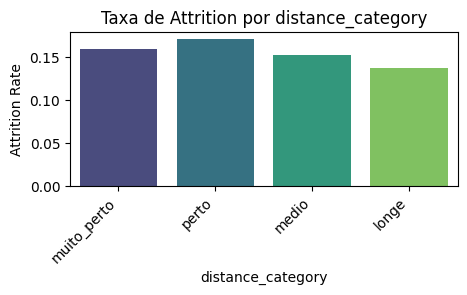

/tmp/ipython-input-2005142022.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=summary.index, y=summary['attrition_rate'], palette='viridis')



--- levelbyeducation ---
                  count  attrition_rate
levelbyeducation                       
0.200000             51        0.235294
2.500000             42        0.214286
1.000000            903        0.186047
0.666667            672        0.183036
1.250000             51        0.176471
0.750000            174        0.172414
0.500000            759        0.166008
1.333333            111        0.162162
1.500000            111        0.162162
4.000000             21        0.142857
0.333333            573        0.141361
0.250000            438        0.130137
2.000000            234        0.128205
0.600000             24        0.125000
3.000000             75        0.120000
0.400000             54        0.111111
1.666667             90        0.100000
0.800000              9        0.000000
5.000000             18        0.000000


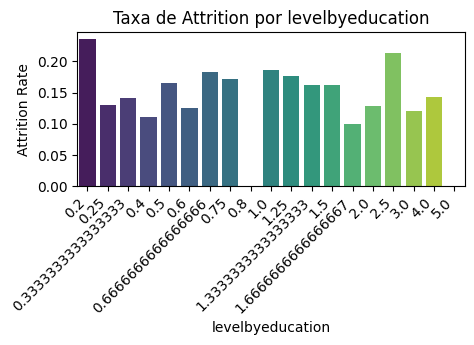

In [15]:
# relação com as categóricas

cat_vars = [
    'businesstravel', 'department', 'education', 'educationfield',
    'gender', 'joblevel', 'jobrole', 'maritalstatus',
    'stockoptionlevel', 'age_group', 'distance_category', 'levelbyeducation'
]

for var in cat_vars:
    print(f"\n--- {var} ---")

    summary = df.groupby(var)['attrition_bin'].agg(['count', 'mean']).sort_values('mean', ascending=False)
    summary.rename(columns={'mean': 'attrition_rate'}, inplace=True)
    print(summary)

    plt.figure(figsize=(5,2))
    sns.barplot(x=summary.index, y=summary['attrition_rate'], palette='viridis')
    plt.title(f'Taxa de Attrition por {var}')
    plt.ylabel('Attrition Rate')
    plt.xlabel(var)
    plt.xticks(rotation=45, ha='right')
    plt.show()

Conclusões da análise de attrition por variável categórica:
- Funcionários que viajam muito têm maior risco de sair.
- Departamento de Human Resources apresenta turnover mais alto.
- Educação isoladamente não é um forte preditor de attrition.
 - Algumas áreas de formação (ex.: Human Resources) têm risco de saída muito maior.
 - Gênero não é um fator crítico para attrition.
 - Há grande variabilidade de turnover entre cargos, útil para segmentação.
 - Funcionários solteiros têm maior risco de sair.
 - Turnover é mais alto entre os mais jovens (18-25 anos).
 - Cargos desproporcionais em relação à educação (levelbyeducation muito baixo ou alto) têm maior risco de saída.
 - Variáveis claramente preditivas: age_group, maritalstatus, businesstravel, department, jobrole, levelbyeducation.
 - Variáveis menos impactantes isoladamente: gender, education, stockoptionlevel.
- Para o modelo, manter todas as variáveis, mas priorizar atenção às que apresentam contraste maior de attrition.